In [ ]:
from google.colab import files

files.upload()
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2
import cv2 as cv
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from time import time
from PIL import Image
from google.colab.patches import cv2_imshow

#Using Adaptive Histogram on Grey Scale Images
# create a CLAHE object (Arguments are optional).
aimg = cv2.imread('A.tif',0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cla = clahe.apply(aimg)

cv2.imwrite('clahe_A.tif',cla)

# create a CLAHE object (Arguments are optional).
bimg = cv2.imread('B.tif',0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clb = clahe.apply(bimg)

cv2.imwrite('clahe_B.tif',clb)

kernel = np.ones((5, 5), np.uint8)
Dilateimg = cv2.dilate(clb, kernel, iterations = 1)
Erodeimg = cv2.erode(Dilateimg, kernel, iterations = 1)

kernel = np.ones((5, 5), np.uint8)
Dilateimg = cv2.dilate(cla, kernel, iterations = 1)
Erodeimg = cv2.erode(Dilateimg, kernel, iterations = 1)

cv2.imwrite("NILNoise_A.tif",Erodeimg)
cv2.imwrite("NILNoise_B.tif",Erodeimg)

True

In [ ]:
dsta = cv.fastNlMeansDenoising(cla,None,90,7,21)
dstb = cv.fastNlMeansDenoising(clb,None,90,7,21)

cv2.imwrite("NewA.tif",dsta)
cv2.imwrite("NewB.tif",dstb)

True

In [ ]:
import cv2
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.decomposition import PCA
import numpy as np

# This implementation is based on the following paper:
# Unsupervised Change Detection in Satellite Images Using Principal Component Analysis and k-Means Clustering
# (Turgay Celik, 2009)
# ieeexplore.ieee.org/abstract/document/5196726

# Global
h = 5
"""Block size (h×h) - must be odd"""
r = (h-1) / 2
"""Block half-length"""

# Load images
image1 = cv2.imread("ConC.png")  # t1
image2 = cv2.imread("ConB.png")  # t2

# Initialise a new size to standardise dimensions between the two images
new_size = np.asarray(image1.shape)

# Resize image into a multiple of block size h (here h=5)
new_size = np.asarray(image1.shape) / h
new_size = new_size.astype(int) * h

# Obtain difference image, i.e. their absolute intensity value differences
# Here the difference image will have pixel values different for the regions where change is noticed when compared
# to the rest of the image.
image1 = cv2.resize(image1, (new_size[1], new_size[0])).astype(int)  # BUG FIX
image2 = cv2.resize(image2, (new_size[1], new_size[0])).astype(int)  # BUG FIX
diff_image = abs(image1 - image2)  # The difference image X_d = |X_2 - X_1|

# Display the difference image
cv2.imwrite("D.png", diff_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

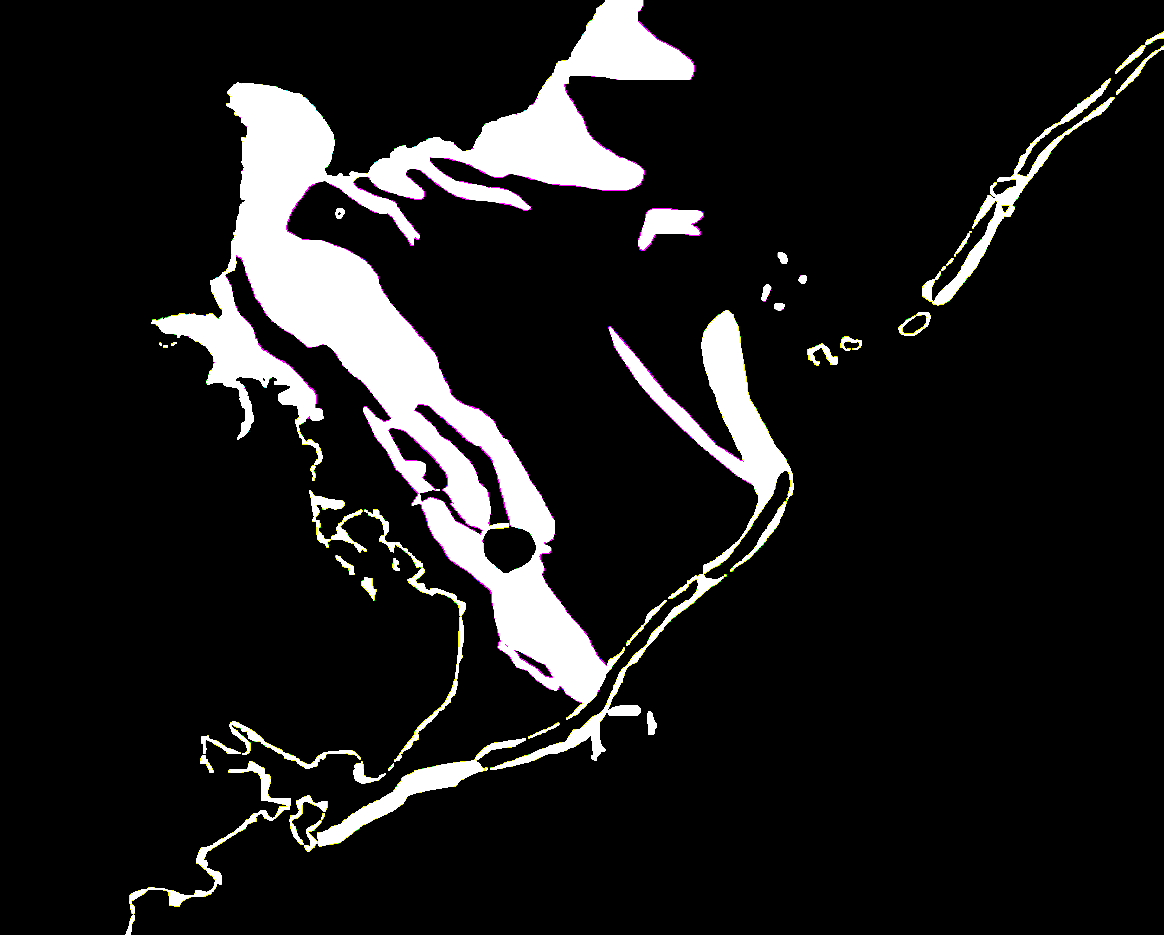

True

In [ ]:
import cv2 as cv
import imageio
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import warnings
import imageio
from skimage import data
from google.colab.patches import cv2_imshow
import sys
import skimage.color
import skimage.filters
import skimage.io
import skimage.viewer

#Define groundtruth and predicted
noal = cv2.imread('D.png')
predicted = cv2.imread('result.png')
ground0 = noal[:,:,:3]

# Global thresholding after Gaussian filtering
ret1,groundtruth = cv2.threshold(ground0,0,255,cv2.THRESH_BINARY)
cv2_imshow(groundtruth)
cv2.imwrite('Groundtruth.png', groundtruth)